<a href="https://colab.research.google.com/github/malickl/Pratique_k-means/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [3]:
# chargement de base d edonées iris
iris = datasets.load_iris()

In [12]:
# affichage des données du dataset
print(f"{iris.target[1]} : {iris.target_names[1]}")

0 : versicolor


In [17]:
iris.data[1]

array([4.9, 3. , 1.4, 0.2])

In [6]:
# stocker les données en tant que DataFrame pandas
x = pd.DataFrame(iris.data)
# definir les noms de colonnes
x.columns = ['Sepal_Length', 'Sepal_width', 'Petal_length', 'Petal_width']
y= pd.DataFrame(iris.target)
y.columns =['classe']

In [18]:
x.head()

,Sepal_Length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


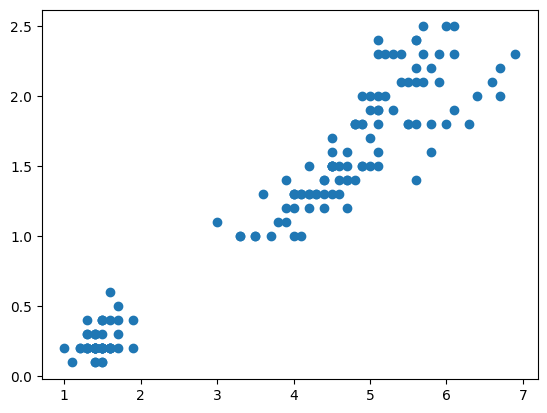

In [20]:
 # Repartition du dataset danns un scatter plot 2D
 plt.scatter(x.Petal_length, x.Petal_width)

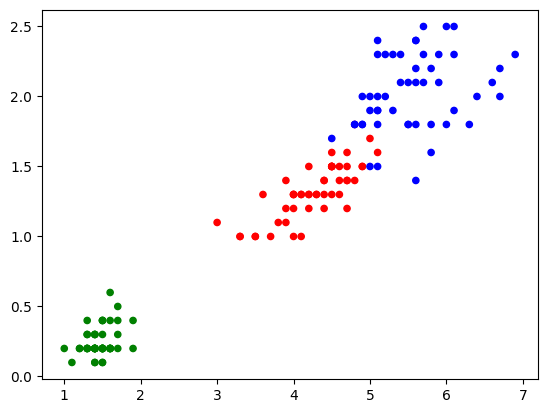

In [24]:
#Visualiser les classes de notre dataset
colorL = np.array(['green','red','blue'])
plt.scatter(x.Petal_length, x.Petal_width, c = colorL[iris.target], s=20)

In [25]:
# utiliser la methode elbow pour trouver le nombre optimal de clusters
inert = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x)
  inert.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

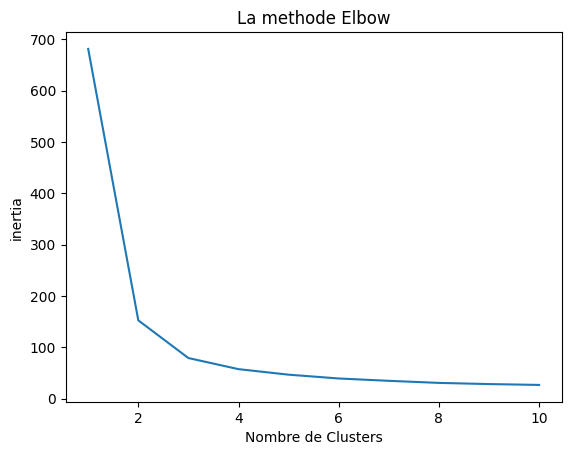

In [28]:
# afficher la coubre de la methode Elbow
plt.plot(range(1,11), inert)
plt.title('La methode Elbow')
plt.xlabel('Nombre de Clusters')
plt.ylabel('inertia')
plt.show()

In [29]:
#Cluster k-means
model = KMeans(n_clusters=3)
model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [30]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

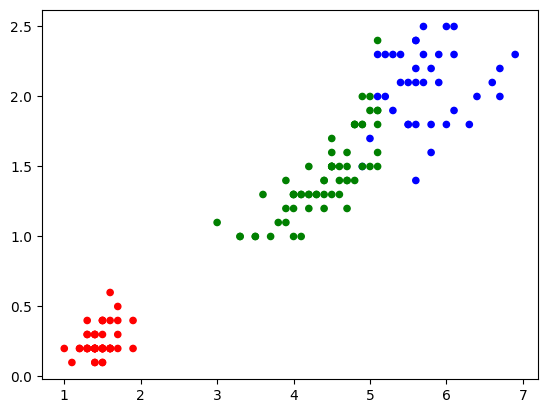

In [33]:
# Visualiser les classes,prédites par le modèle
colorL = np.array(['green', 'red', 'blue'])
plt.scatter(x.Petal_length, x.Petal_width, c = colorL[model.labels_], s=20)

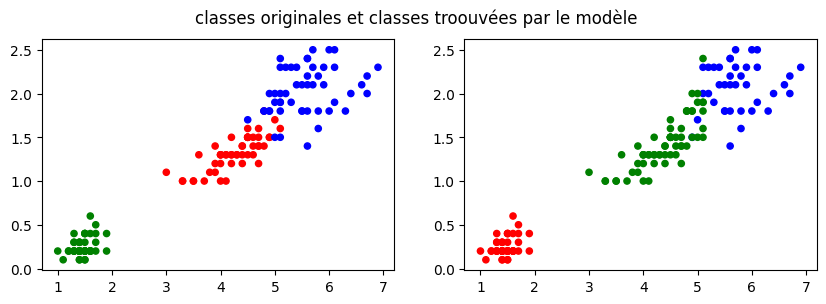

In [38]:
# Visualiser les classes originales et prédites par le modèle
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,3))
fig.suptitle('classes originales et classes troouvées par le modèle')
ax1.scatter(x.Petal_length, x.Petal_width, c = colorL[iris.target], s=20)
ax2.scatter(x.Petal_length, x.Petal_width, c = colorL[model.labels_], s=20)

In [37]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, model.labels_)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])